#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Advanced Machine Learning Methods**
###**Tecnológico de Monterrey**
###**Prof José Antonio Cantoral Ceballos**

###**Word Embeddings**
###**Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch**

#### **Team 56:**

* Daniel Ruiz Gutiérrez A01100513
* José Manuel GarcÍa Ogarrio A01795147
* Miriam Bönsch A01330346
* Raul Eduardo Gomez Godinez A01795214
* Renzo Zagni A01795457
* Roger Alexei Urrutia ParKer A01362405


## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


### Import libraries

In [ ]:
#Paso 1
!pip uninstall -y torch torchtext torchvision torchaudio torchsummary

Found existing installation: torch 2.5.0+cu121
Uninstalling torch-2.5.0+cu121:
  Successfully uninstalled torch-2.5.0+cu121
Found existing installation: torchvision 0.20.0+cu121
Uninstalling torchvision-0.20.0+cu121:
  Successfully uninstalled torchvision-0.20.0+cu121
Found existing installation: torchaudio 2.5.0+cu121
Uninstalling torchaudio-2.5.0+cu121:
  Successfully uninstalled torchaudio-2.5.0+cu121
Found existing installation: torchsummary 1.5.1
Uninstalling torchsummary-1.5.1:
  Successfully uninstalled torchsummary-1.5.1


In [ ]:
#pip list

In [ ]:
# conda install -c pytorch torchtext
# conda install -c pytorch torchdata
# conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch

In [ ]:
#paso 2
!pip install torch==2.0.0 torchtext==0.15.1 torchvision==0.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177

In [ ]:
!pip install portalocker

In [ ]:
import torch
import torchtext
import torchvision

print(f"Torch version: {torch.__version__}")
print(f"TorchText version: {torchtext.__version__}")
print(f"TorchVision version: {torchvision.__version__}")

Torch version: 2.0.0+cu117
TorchText version: 0.15.1+cpu
TorchVision version: 0.15.1+cu117


In [ ]:
#!pip install portalocker>=2.0.0

In [ ]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.28.0.34.7
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [ ]:
gpu_disponible = torch.cuda.is_available()
version_cuda_torch = torch.version.cuda
nombre_dispositivo = torch.cuda.get_device_name(0) if gpu_disponible else "No disponible"

print("GPU disponible en PyTorch:", gpu_disponible)
print("Versión de CUDA en PyTorch:", version_cuda_torch)
print("Nombre del dispositivo GPU:", nombre_dispositivo)

GPU disponible en PyTorch: True
Versión de CUDA en PyTorch: 11.7
Nombre del dispositivo GPU: Tesla T4


In [ ]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

#from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# These libraries are suggested to plot confusion matrix
# you may use others
#import scikitplot as skplt
import gc

### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In [ ]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

In [ ]:
train_dataset

<torchtext.data.functional.to_map_style_dataset.<locals>._MapStyleDataset at 0x7f87936b7f10>

In [ ]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

In [ ]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

In [ ]:
#test tokens
tokens = tokeniser('Welcome to TE3007')
print(tokens, vocab(tokens))

['welcome', 'to', 'te3007'] [3314, 4, 0]


In [ ]:
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [ ]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [ ]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


In [ ]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

In [ ]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader   = DataLoader(val_dataset  , batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader  = DataLoader(test_dataset , batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### Let us build our RNN model

In [ ]:
EMBEDDING_SIZE = 100 # complete
NEURONS        =  50 # complete
LAYERS         =   2 # complete
NUM_CLASSES    =   4 # complete

In [ ]:
import torch
import torch.nn as nn

class RNN_Model_1(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):

        # Embedding layer - transform words to vectors  (size=embed_size)
        super().__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        # LSTM layer for processing text
        self.rnn = nn.LSTM(
            input_size=embed_size,   # Size of the input feature (word embeddings size)
            hidden_size=hidden,      # Number of units in the hidden state
            num_layers=layers,       # Number of LSTM layers stacked
            batch_first=True,        # First dimension is batch size
            bidirectional=False      # No bidirectional
        )

        # Final Fully Connected layer for classification
        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):
        x = self.embedding_layer(x)   # Pass the input through the embedding layer to obtain word embeddings
        out, (h_n, c_n) = self.rnn(x) # Pass the embeddings through the LSTM layer
        out = out[:, -1, :]           # Only the last output of the sequence is used for classification
        out = self.fc(out)            # final output through a fully connected layer
        return out                    # Prediction

In [ ]:
def accuracy(model, loader):

    # Initialize counters for correct predictions and total samples
    num_correct = 0
    num_total = 0

    # Set the model to evaluation mode
    model.eval()
    model = model.to(device=device)

    # Disable gradient calculation and iterate over the data loader
    with torch.no_grad():
        for (xi, yi) in loader:
            xi = xi.to(device=device, dtype = torch.long)
            yi = yi.to(device=device, dtype = torch.long)

            # Get the model's predictions
            scores = model(xi)
            _, pred = scores.max(dim=1)
            num_correct += (pred == yi).sum()
            num_total += pred.size(0)
            # Calculate accuracy as the ratio of correct predictions to total predictions
        return float(num_correct)/num_total

In [ ]:
def train(model, optimiser, epochs=100):
    # Move the model to GPU
    model = model.to(device=device)
    # Loop through the number of epochs
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            # Set the model to training mode (
            model.train()
            xi = xi.to(device=device, dtype=torch.long)
            yi = yi.to(device=device, dtype=torch.long)

             # Get the model's predictions
            scores = model(xi)
            # Compute the loss
            cost = F.cross_entropy(input= scores, target=yi)
            # Compute gradients
            # Zero the gradients from the previous step, backpropagate to calculate the gradients and update weights
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

        # Calculate the accuracy of the model on the validation set after each epoch
        acc = accuracy(model, val_loader)
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
epochs = 10
lr     = 0.001

rnn_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
optimiser = torch.optim.Adam(rnn_model.parameters(), lr=lr)

In [ ]:
train(rnn_model, optimiser=optimiser,  epochs=epochs)

Epoch: 0, costo: 0.5252256989479065, accuracy: 0.82725,
Epoch: 1, costo: 0.2738589644432068, accuracy: 0.8801666666666667,
Epoch: 2, costo: 0.27501100301742554, accuracy: 0.8968333333333334,
Epoch: 3, costo: 0.21617713570594788, accuracy: 0.9019166666666667,
Epoch: 4, costo: 0.20932285487651825, accuracy: 0.9020833333333333,
Epoch: 5, costo: 0.17305998504161835, accuracy: 0.9023333333333333,
Epoch: 6, costo: 0.09062284976243973, accuracy: 0.9005,
Epoch: 7, costo: 0.1160782054066658, accuracy: 0.9010833333333333,
Epoch: 8, costo: 0.10037797689437866, accuracy: 0.8959166666666667,
Epoch: 9, costo: 0.09985774010419846, accuracy: 0.89925,


In [ ]:
print(f'{accuracy(rnn_model, test_loader):.4f}')

0.9021


In [ ]:
def sample_text(model, loader):
    # Set the model to evaluation mode
    model.eval()
    model = model.to(device=device)

    all_samples = []
    y_test_array = []

    # Get the model's predictions similar to accuracy function.
    with torch.no_grad():
      for (xi, yi) in loader:
        xi = xi.to(device=device, dtype = torch.long)
        yi = yi.to(device=device, dtype = torch.long)
        scores = model(xi)
        _, pred = scores.max(dim=1)

        all_samples.append(pred)
        y_test_array.append(yi)

    return all_samples, y_test_array

In [ ]:
pred_array, test_array = sample_text(rnn_model, test_loader)

all_preds_test = torch.cat(pred_array).cpu().numpy()
all_real_test  = torch.cat(test_array).cpu().numpy()

<Axes: >

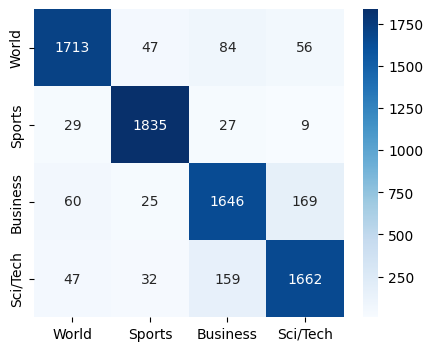

In [ ]:
conf_matrix = confusion_matrix(all_real_test, all_preds_test)

plt.figure(figsize=(5, 4))

sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

# Conclusion:


In this exercise, we explored the application of Recurrent Neural Networks (RNNs), specifically Long Short-Term Memory (LSTM) networks, for text classification using the AG_NEWS dataset in PyTorch.

The model architecture consisted of an embedding layer with an embedding size  of 100, followed by an LSTM layer with 50 neurons and 2 layers, culminating in a fully connected layer for classification into 4 NUM_CLASSES.

Through this hands-on experience, we gained insights into defining, training, and evaluating RNN models, achieving an accuracy of over 90% on the test dataset.


